In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
import pandas as pd
import numpy as np
from pycaret.regression import *
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [ ]:
data_path = 'imputed 2007-2023 (1).csv'
df = pd.read_csv(data_path, parse_dates=['Date'])

In [ ]:
# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['close'] = scaler.fit_transform(np.array(df['close']).reshape(-1, 1))

In [ ]:
# Pembagian data latih 90% dan data validasi 10%
training_size = int(len(df) * 0.9)
train_data, test_data = df[:training_size], df[training_size:]

In [ ]:
# PyCaret setup
reg = setup(data=train_data, target='close', session_id=123, train_size=0.9, fold=5, verbose=False)



In [ ]:
# Membandingkan model
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0040,0.0000,0.0061,0.9996,0.0039,0.0160,1.6860
ridge,Ridge Regression,0.0040,0.0000,0.0061,0.9996,0.0039,0.0160,0.1740
br,Bayesian Ridge,0.0040,0.0000,0.0061,0.9996,0.0039,0.0160,0.0960
rf,Random Forest Regressor,0.0043,0.0001,0.0070,0.9994,0.0044,0.0116,0.9780
llar,Lasso Least Angle Regression,0.0051,0.0001,0.0072,0.9994,0.0045,0.0618,0.0780
lightgbm,Light Gradient Boosting Machine,0.0045,0.0000,0.0070,0.9994,0.0043,0.0169,0.2400
xgboost,Extreme Gradient Boosting,0.0047,0.0001,0.0072,0.9994,0.0045,0.0200,0.1500
gbr,Gradient Boosting Regressor,0.0048,0.0001,0.0073,0.9994,0.0046,0.0227,0.3760
et,Extra Trees Regressor,0.0042,0.0000,0.0069,0.9994,0.0043,0.0110,0.8260
lar,Least Angle Regression,0.0051,0.0001,0.0078,0.9993,0.0050,0.0249,0.1420


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Membuat model terbaik
model = create_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0042,0.0000,0.0065,0.9995,0.0041,0.0180
1,0.0040,0.0000,0.0060,0.9996,0.0039,0.0146
2,0.0040,0.0000,0.0061,0.9996,0.0040,0.0179
3,0.0039,0.0000,0.0059,0.9996,0.0037,0.0142
4,0.0040,0.0000,0.0061,0.9996,0.0039,0.0154
Mean,0.0040,0.0000,0.0061,0.9996,0.0039,0.0160
Std,0.0001,0.0000,0.0002,0.0000,0.0001,0.0016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Melatih model terbaik
model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0042,0.0000,0.0065,0.9995,0.0041,0.0180
1,0.0040,0.0000,0.0060,0.9996,0.0039,0.0146
2,0.0040,0.0000,0.0061,0.9996,0.0040,0.0179
3,0.0039,0.0000,0.0059,0.9996,0.0037,0.0142
4,0.0040,0.0000,0.0061,0.9996,0.0039,0.0154
Mean,0.0040,0.0000,0.0061,0.9996,0.0039,0.0160
Std,0.0001,0.0000,0.0002,0.0000,0.0001,0.0016


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 2 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# Memprediksi data uji
predictions = predict_model(model, data=test_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0040,0.0000,0.0052,0.9955,0.0039,0.0129


In [ ]:
# Menampilkan kolom pada DataFrame predictions untuk melihat nama kolom prediksi
print(predictions.columns)

Index(['Date', 'open', 'high', 'low', 'Volume', 'close', 'prediction_label'], dtype='object')


In [ ]:
# Memastikan kolom prediksi benar
prediction_column = 'Label' if 'Label' in predictions.columns else 'prediction_label'  # Adjust this based on actual column name


In [ ]:
# Menambahkan kolom prediksi ke DataFrame test_data
test_data['close_pred'] = predictions[prediction_column]

In [ ]:
# Membalikkan skala prediksi dan data asli
test_data['close_pred'] = scaler.inverse_transform(test_data[['close_pred']])
test_data['close_actual'] = scaler.inverse_transform(test_data[['close']])

In [ ]:
# Menghitung MAPE dan RMSE
test_mape = mean_absolute_percentage_error(test_data['close_actual'], test_data['close_pred'])
test_rmse = np.sqrt(mean_squared_error(test_data['close_actual'], test_data['close_pred']))

print(f'Test MAPE: {test_mape}, Test RMSE: {test_rmse}')

Test MAPE: 0.011569019015760714, Test RMSE: 9.446986206377007


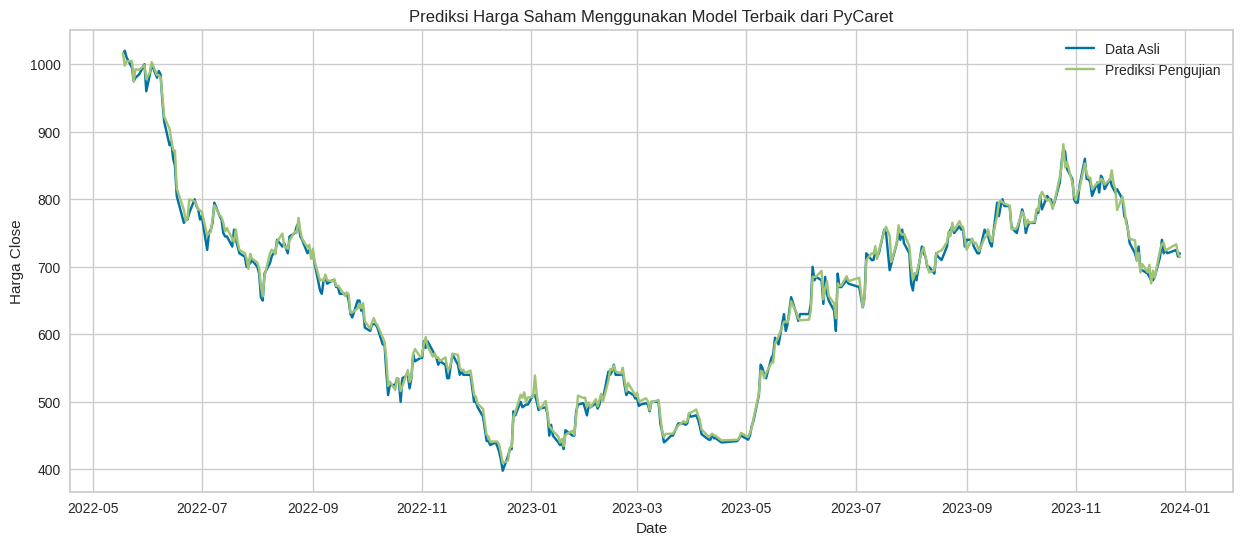

In [ ]:
# Visualisasi hasil prediksi terhadap nilai asli
plt.figure(figsize=(15, 6))
plt.plot(test_data['Date'], test_data['close_actual'], label='Data Asli')
plt.plot(test_data['Date'], test_data['close_pred'], label='Prediksi Pengujian')
plt.xlabel('Date')
plt.ylabel('Harga Close')
plt.title('Prediksi Harga Saham Menggunakan Model Terbaik dari PyCaret')
plt.legend()
plt.show()

In [ ]:
# Melihat parameter dari model yang telah dituning
print(model)

LinearRegression(n_jobs=-1)
